<a href="https://colab.research.google.com/github/alphabir/Ecommerce-Project/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [6]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [7]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [8]:
data = load_data('AAPL')
df=data
df.head()

/tmp/ipython-input-3830313737.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
1,2015-01-05,23.577576,24.110152,23.391175,24.030265,257142000
2,2015-01-06,23.579784,23.839415,23.218076,23.641918,263188400
3,2015-01-07,23.910433,24.010290,23.677430,23.788384,160423600
4,2015-01-08,24.829124,24.886821,24.121242,24.238854,237458000


In [9]:
df = df.drop(['Date'], axis = 1)
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
1,2015-01-05,23.577576,24.110152,23.391175,24.030265,257142000
2,2015-01-06,23.579784,23.839415,23.218076,23.641918,263188400
3,2015-01-07,23.910433,24.010290,23.677430,23.788384,160423600
4,2015-01-08,24.829124,24.886821,24.121242,24.238854,237458000


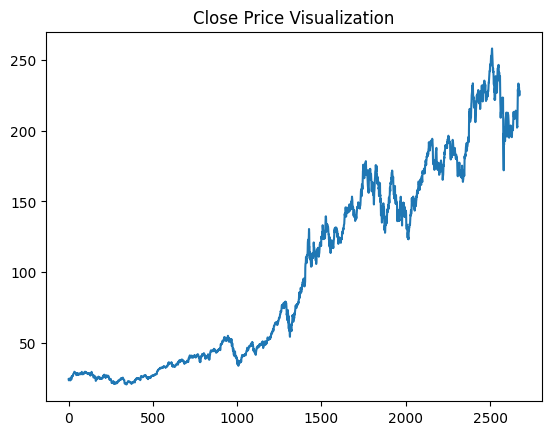

In [10]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [11]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
1,2015-01-05,23.577576,24.110152,23.391175,24.030265,257142000
2,2015-01-06,23.579784,23.839415,23.218076,23.641918,263188400
3,2015-01-07,23.910433,24.010290,23.677430,23.788384,160423600
4,2015-01-08,24.829124,24.886821,24.121242,24.238854,237458000
...,...,...,...,...,...,...
2671,2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2672,2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600
2673,2025-08-20,226.009995,230.470001,225.770004,229.979996,42263900


# Plotting moving averages of 100 day

---



In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2671,206.807447
2672,206.903156
2673,206.930222
2674,207.005542


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

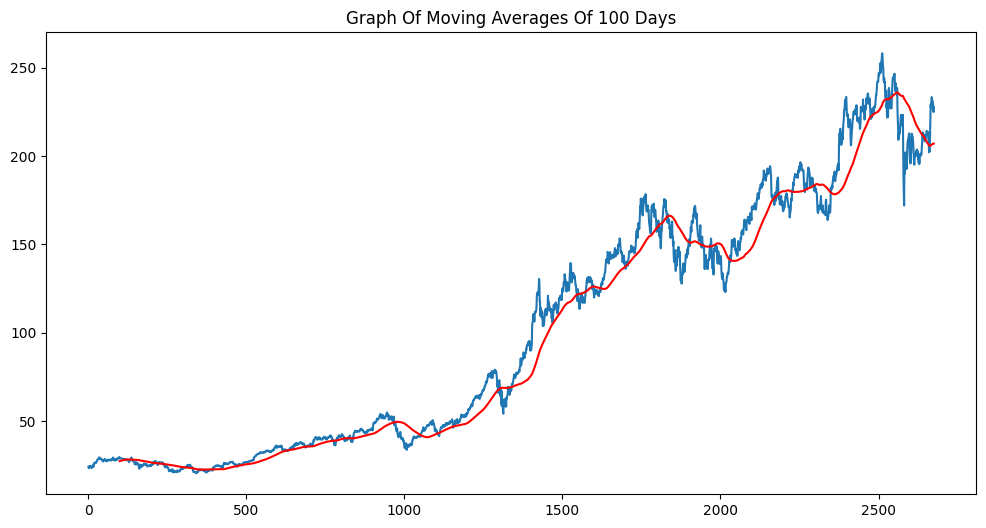

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2671,220.500115
2672,220.489977
2673,220.474857
2674,220.475039


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

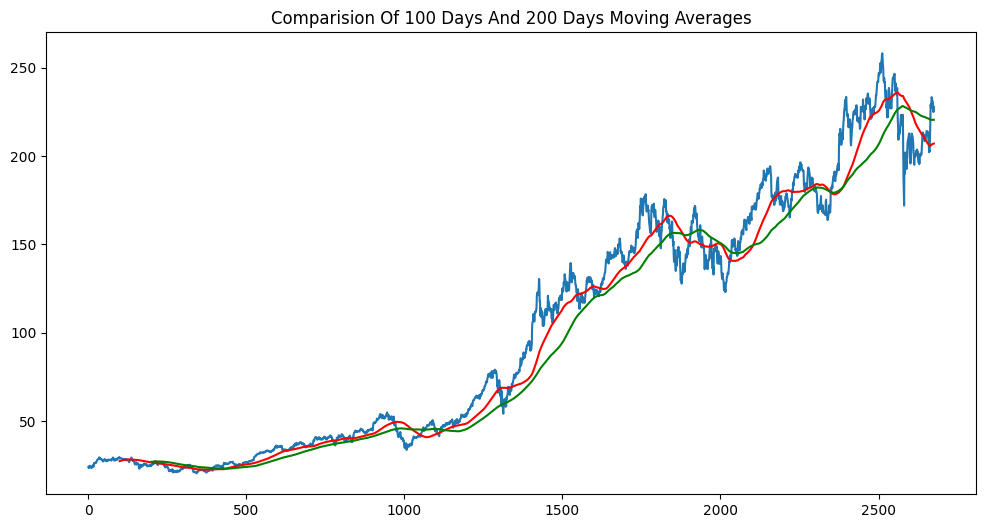

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [16]:
df.shape

(2676, 6)

# Spliting the dataset into training (70%) and testing (30%) set

In [17]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1873, 6)
(803, 6)


In [18]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
1,2015-01-05,23.577576,24.110152,23.391175,24.030265,257142000
2,2015-01-06,23.579784,23.839415,23.218076,23.641918,263188400
3,2015-01-07,23.910433,24.010290,23.677430,23.788384,160423600
4,2015-01-08,24.829124,24.886821,24.121242,24.238854,237458000


In [19]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
1873,2022-06-10,134.811722,138.380344,134.742898,137.908463,91437900
1874,2022-06-13,129.650482,132.914347,129.217918,130.623736,122207100
1875,2022-06-14,130.515579,131.626480,129.257220,130.879334,84784300
1876,2022-06-15,133.140457,135.018171,129.925750,132.019730,91533000
1877,2022-06-16,127.861244,130.151856,126.858484,129.847099,108123900


# Using MinMax scaler for normalization of the dataset

---



In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [22]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0263194 ],
       [0.02197941],
       [0.01952934],
       ...,
       [0.7656766 ],
       [0.79191205],
       [0.78260896]])

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(1773, 100, 1)

# ML Model (LSTM)

---



In [25]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [32]:
past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
input_data = scaler.fit_transform(final_df)
input_data

x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

(803, 100, 1)
(803,)
Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step - MAE: 0.1721 - loss: 0.0668 - val_MAE: 0.1330 - val_loss: 0.0247
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - MAE: 0.0670 - loss: 0.0106 - val_MAE: 0.0789 - val_loss: 0.0094
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - MAE: 0.0531 - loss: 0.0069 - val_MAE: 0.0670 - val_loss: 0.0067
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - MAE: 0.0453 - loss: 0.0055 - val_MAE: 0.0707 - val_loss: 0.0075
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - MAE: 0.0441 - loss: 0.0050 - val_MAE: 0.0643 - val_loss: 0.0064
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - MAE: 0.0451 - loss: 0.0052 - val_MAE: 0.0667 - val_loss: 0.0067
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - MAE: 0.0451 - loss: 0.0049 - val_MAE: 0.0671 - val_loss: 0.0068
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - MAE: 0.0428 - loss: 0.0047 - val_MAE: 0.0649 - val_loss: 0.0063
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [33]:
model.save('keras_model.h5')

In [34]:

test_close.shape
test_close

array([[137.90846275],
       [130.62373594],
       [130.87933427],
       [132.01973022],
       [129.84709892],
       [127.87110581],
       [131.1644803 ],
       [132.51126797],
       [134.50695055],
       [137.53488122],
       [140.28754815],
       [139.72718457],
       [135.13616959],
       [134.92969969],
       [133.74015659],
       [135.44091846],
       [138.96039486],
       [140.86757338],
       [142.80427725],
       [143.20731568],
       [143.29580384],
       [140.57270474],
       [141.64425311],
       [147.24786518],
       [148.19164895],
       [145.41933284],
       [148.56520429],
       [151.88810328],
       [152.76301084],
       [151.40633528],
       [149.68592492],
       [150.00053965],
       [154.32611009],
       [158.51414571],
       [158.28800912],
       [157.393391  ],
       [158.12090933],
       [163.2034976 ],
       [160.67371288],
       [163.78458163],
       [161.47110884],
       [165.0742003 ],
       [167.417268  ],
       [167

In [35]:
past_100_days = pd.DataFrame(train_close[-100:])

In [36]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [38]:
final_df = pd.concat([past_100_days, test_df], ignore_index = True)

In [39]:
final_df.head()

,0
0,168.148893
1,166.668521
2,163.707653
3,161.197838
4,156.884092


In [40]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.32996253],
       [0.31883351],
       [0.29657454],
       [0.27770647],
       [0.24527695],
       [0.23761155],
       [0.2709258 ],
       [0.26318691],
       [0.28721432],
       [0.32001256],
       [0.34838869],
       [0.35384244],
       [0.35185253],
       [0.33282778],
       [0.34153566],
       [0.33319679],
       [0.36507734],
       [0.35098202],
       [0.33762445],
       [0.30102075],
       [0.32758808],
       [0.33408237],
       [0.32803078],
       [0.31910155],
       [0.2833834 ],
       [0.28751602],
       [0.19187382],
       [0.27497014],
       [0.26921411],
       [0.28131699],
       [0.27902896],
       [0.30913873],
       [0.27976694],
       [0.27142804],
       [0.23792381],
       [0.25755366],
       [0.2481078 ],
       [0.2387354 ],
       [0.18353466],
       [0.17947575],
       [0.22486137],
       [0.23637399],
       [0.25039555],
       [0.27253506],
       [0.28729456],
       [0.30559633],
       [0.32825214],
       [0.349

In [41]:
input_data.shape

(903, 1)

# Testing the model

---



In [42]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [43]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(803, 100, 1)
(803,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [44]:
# Making predictions

y_pred = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


In [45]:
y_pred.shape

(803, 1)

In [46]:
y_test

array([0.10262354, 0.04785902, 0.04978054, 0.05835371, 0.04202049,
       0.02716553, 0.05192419, 0.06204895, 0.07705193, 0.09981506,
       0.12050883, 0.11629617, 0.08178222, 0.08023004, 0.07128739,
       0.08407324, 0.11053167, 0.12486929, 0.13942889, 0.14245881,
       0.14312404, 0.12265255, 0.13070815, 0.17283452, 0.17992962,
       0.15908813, 0.1827379 , 0.20771852, 0.21429583, 0.20409672,
       0.19116316, 0.19352835, 0.22604676, 0.25753123, 0.2558312 ,
       0.24910571, 0.25457499, 0.29278445, 0.27376624, 0.29715288,
       0.27976084, 0.30684786, 0.32446238, 0.32268596, 0.33526746,
       0.34459289, 0.34451881, 0.35177138, 0.34644302, 0.3217241 ,
       0.3024075 , 0.30418382, 0.31498918, 0.3282367 , 0.25852029,
       0.26577307, 0.25230349, 0.2251422 , 0.24815901, 0.22388426,
       0.21167276, 0.21034081, 0.21648341, 0.24697478, 0.24926906,
       0.21145063, 0.21041426, 0.18495531, 0.17089364, 0.20116321,
       0.23032254, 0.1936143 , 0.1848075 , 0.17348395, 0.19627

In [47]:
y_pred

array([[0.14450923],
       [0.14378658],
       [0.1433287 ],
       [0.14291684],
       [0.14242494],
       [0.14172037],
       [0.14066872],
       [0.13918734],
       [0.13725676],
       [0.13492462],
       [0.13227019],
       [0.12948717],
       [0.1267742 ],
       [0.12421913],
       [0.12187452],
       [0.11975993],
       [0.11788123],
       [0.11625683],
       [0.11492024],
       [0.11390968],
       [0.1132543 ],
       [0.11297033],
       [0.11304752],
       [0.11346161],
       [0.11420605],
       [0.11528533],
       [0.11669044],
       [0.11841617],
       [0.12055196],
       [0.12319028],
       [0.12633611],
       [0.12991887],
       [0.13387705],
       [0.13820645],
       [0.14309908],
       [0.14867938],
       [0.15512176],
       [0.16256598],
       [0.17132518],
       [0.18113846],
       [0.19167057],
       [0.20296298],
       [0.21488614],
       [0.22745514],
       [0.24013957],
       [0.25279865],
       [0.2653031 ],
       [0.277

In [48]:
scaler.scale_

array([0.00751772])

In [49]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

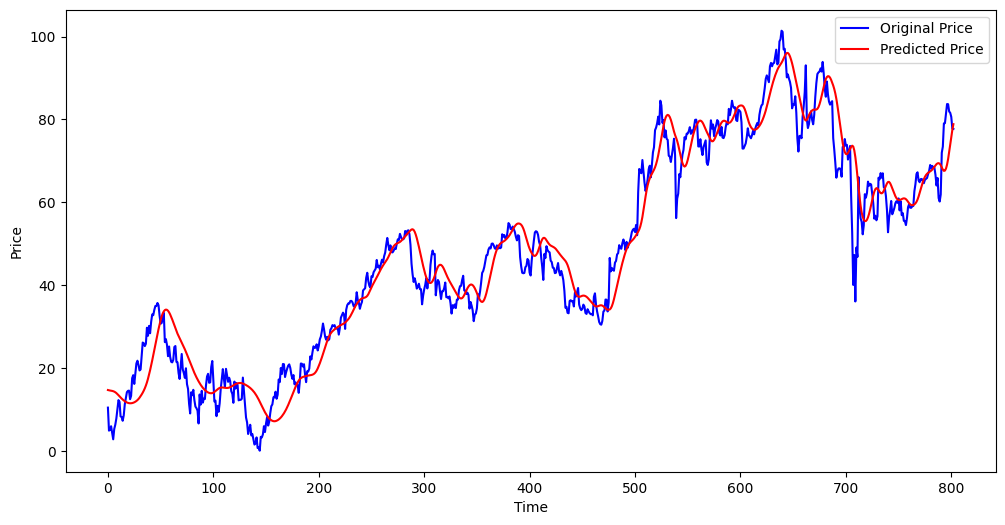

In [50]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [51]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.806921737178834
